# Business Understanding

## Project Domain

Domain: Kesehatan & Teknologi Medis (Healthcare & Medical Technology)

Sub-Domain: Sistem Skrining & Pendukung Keputusan Klinis (Screening & Clinical Decision Support Systems)

Sistem Skrining Autism Spectrum Disorder (ASD) pada Orang Dewasa ini termasuk dalam bidang teknologi kesehatan yang bertujuan untuk deteksi dini dan dukungan keputusan. Proyek ini memanfaatkan data science dan machine learning untuk membangun model prediksi yang dapat membantu mengidentifikasi individu dewasa yang menunjukkan ciri-ciri konsisten dengan ASD.

Model ini dilatih menggunakan data yang mencakup jawaban dari kuesioner skrining autisme (AQ-10), serta data demografis dan riwayat kesehatan relevan lainnya. Tujuannya adalah untuk menciptakan alat bantu skrining awal yang efisien, mudah diakses, dan objektif. Penting untuk ditekankan bahwa sistem ini berfungsi sebagai alat skrining (screening tool), bukan alat diagnostik (diagnostic tool). Hasil dari model ini bertujuan untuk memberikan indikasi awal dan merekomendasikan individu untuk mencari evaluasi klinis formal dari profesional kesehatan, sehingga mempercepat proses penanganan dan dukungan yang tepat.

## Problem Statements

Masalah yang Dihadapi:

1. Keterlambatan dan Kesulitan Diagnosis pada Orang Dewasa
Banyak orang dewasa yang berada dalam spektrum autisme (ASD) tidak pernah menerima diagnosis formal selama masa kanak-kanak. Gejala pada orang dewasa bisa lebih kompleks dan sering kali tumpang tindih dengan kondisi kesehatan mental lain seperti kecemasan sosial, depresi, atau ADHD, yang menyebabkan kesalahan diagnosis atau diagnosis yang tidak kunjung ditegakkan.

2. Akses Terbatas dan Biaya Tinggi ke Layanan Spesialis
Proses diagnosis ASD yang valid memerlukan evaluasi komprehensif oleh psikolog atau psikiater yang memiliki keahlian khusus. Spesialis ini jumlahnya terbatas, seringkali berlokasi di kota-kota besar, dan memiliki daftar tunggu yang panjang. Biaya untuk konsultasi dan serangkaian tes diagnostik juga sangat mahal, sehingga menjadi penghalang signifikan bagi banyak individu.

3. Kurangnya Kesadaran dan Stigma di Masyarakat
Banyak orang dewasa tidak menyadari bahwa kesulitan yang mereka alami (misalnya dalam interaksi sosial, komunikasi, atau sensitivitas sensorik) bisa jadi merupakan tanda-tanda autisme. Selain itu, stigma yang melekat pada kondisi neurodivergen dapat membuat seseorang enggan mencari bantuan atau diagnosis, karena khawatir akan diskriminasi di lingkungan kerja maupun sosial.

4. Dampak Negatif Akibat Tidak Terdiagnosis
Tanpa pemahaman yang benar mengenai kondisi mereka, orang dewasa dengan ASD sering mengalami kesulitan kronis dalam membangun hubungan, mempertahankan pekerjaan, dan mengelola kesehatan mental mereka. Hal ini dapat berujung pada isolasi sosial, tingkat stres yang tinggi, burnout, serta menurunnya kualitas hidup secara keseluruhan. Sebuah alat skrining awal dapat menjadi langkah pertama untuk mendapatkan pemahaman dan dukungan yang mereka butuhkan.

## Goals

Membangun sebuah model klasifikasi machine learning (misalnya menggunakan algoritma seperti Logistic Regression, Random Forest, atau Support Vector Machine) yang mampu memberikan prediksi awal (skrining) terhadap kemungkinan Autism Spectrum Disorder (ASD) pada orang dewasa.

Prediksi ini didasarkan pada analisis parameter-parameter berikut:

1. Data Perilaku: Jawaban dari 10 pertanyaan skrining spesifik (berdasarkan kuesioner AQ-10).

2. Data Demografis: Usia, jenis kelamin, dan etnisitas individu.

3. Data Riwayat: Informasi mengenai riwayat ASD dalam keluarga dan riwayat penyakit kuning (jaundice) saat lahir.

## Solution Statements

* Model Deep Learning (Jaringan Saraf Tiruan)
Menggunakan TensorFlow Keras untuk membangun model klasifikasi berbasis Artificial Neural Network (ANN). Model ini memiliki arsitektur Sequential dengan beberapa lapisan Dense, fungsi aktivasi ReLU dan Sigmoid, serta dilengkapi dengan mekanisme Dropout dan regularisasi L2 untuk mencegah overfitting. Model dilatih untuk memprediksi kemungkinan ASD dengan akurasi pengujian mencapai 98.58%, menunjukkan performa yang sangat tinggi.

* Aplikasi Simulasi Prediksi
Membuat skrip simulasi sederhana untuk menguji fungsionalitas model pada data baru. Pengguna dapat memasukkan data sampel yang terdiri dari 19 parameter (termasuk jawaban kuesioner, demografi, dan riwayat) dalam format kamus Python (dictionary). Skrip ini kemudian melakukan pra-pemrosesan (seperti one-hot encoding dan scaling) sebelum memasukkannya ke model untuk mendapatkan hasil prediksi secara instan.

* Optimasi dan Deployment dengan TensorFlow Lite
Model yang telah dilatih dikonversi ke format TensorFlow Lite (.tflite). Konversi ini bertujuan untuk mengoptimalkan model agar menjadi lebih ringan dan efisien, sehingga sangat cocok untuk dijalankan pada perangkat seluler (seperti Android atau iOS) atau perangkat dengan sumber daya komputasi yang terbatas. Aset pendukung seperti scaler dan label encoder juga disimpan menggunakan Joblib untuk memastikan konsistensi pra-pemrosesan data pada saat deployment.

# Data Understanding

## Import data dari kaggle

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dwirama21","key":"2e49dcc7cf403e23ebf9a32a44f7d021"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d andrewmvd/autism-screening-on-adults

Dataset URL: https://www.kaggle.com/datasets/andrewmvd/autism-screening-on-adults
License(s): other
  0% 0.00/7.38k [00:00<?, ?B/s]
100% 7.38k/7.38k [00:00<00:00, 28.1MB/s]


In [4]:
!mkdir autism-screening-on-adults
!unzip autism-screening-on-adults.zip -d autism-screening-on-adults
!ls autism-screening-on-adults

Archive:  autism-screening-on-adults.zip
  inflating: autism-screening-on-adults/autism_screening.csv  
autism_screening.csv


## Import Library yang dibutuhkan

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report

## Exploratory Data Analysis

In [6]:
df = pd.read_csv('/content/autism-screening-on-adults.zip')

In [7]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

In [9]:
df = df.drop('age_desc', axis=1)

In [10]:
df = df.drop(df[df['age'] == '383'].index)

In [11]:
df['age'] = pd.to_numeric(df['age'])

In [12]:
df['age'].fillna(df['age'].mean(), inplace=True)

/tmp/ipython-input-12-1503503937.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)


In [13]:
df['ethnicity'].fillna(df['ethnicity'].mode()[0], inplace=True)

/tmp/ipython-input-13-3111425235.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ethnicity'].fillna(df['ethnicity'].mode()[0], inplace=True)


In [14]:
df['relation'].fillna(df['relation'].mode()[0], inplace=True)

/tmp/ipython-input-14-2939519266.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['relation'].fillna(df['relation'].mode()[0], inplace=True)


/tmp/ipython-input-16-2082798108.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class/ASD', data=df, palette='viridis')


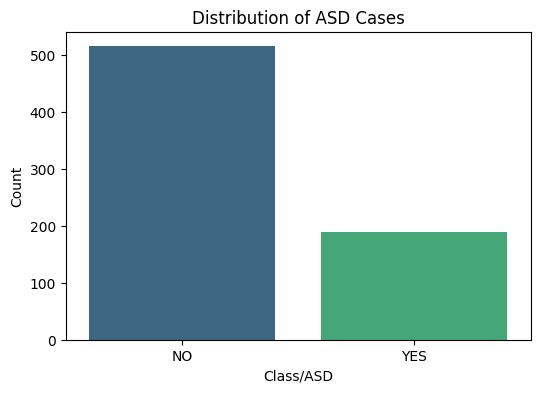

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Class/ASD', data=df, palette='viridis')
plt.title('Distribution of ASD Cases')
plt.xlabel('Class/ASD')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-17-3268250389.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['age'], bins=20, kde=True, palette='viridis')


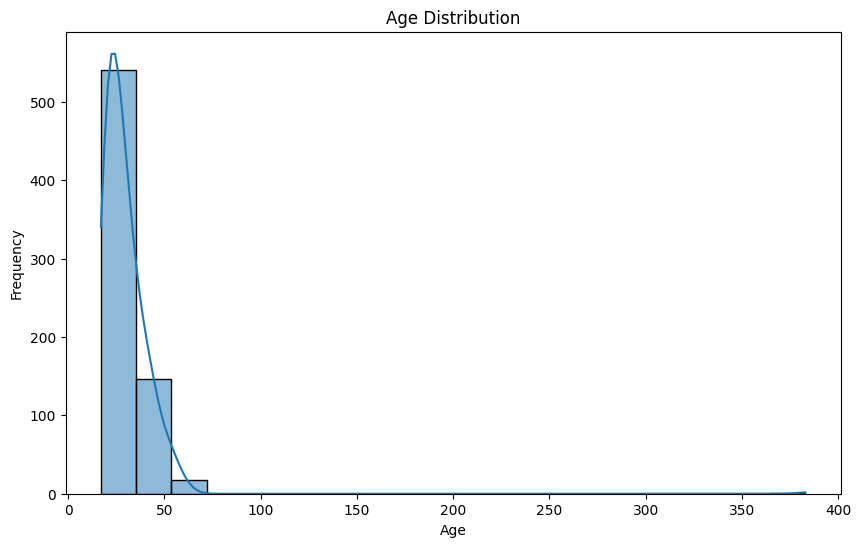

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True, palette='viridis')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

/tmp/ipython-input-18-1191545703.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df, palette='viridis')


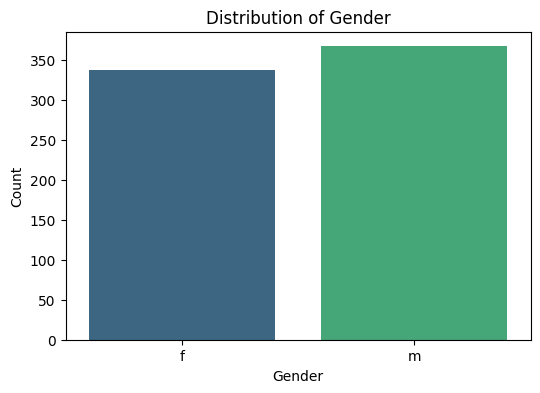

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=df, palette='viridis')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-19-998243915.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ethnicity', data=df, palette='viridis')


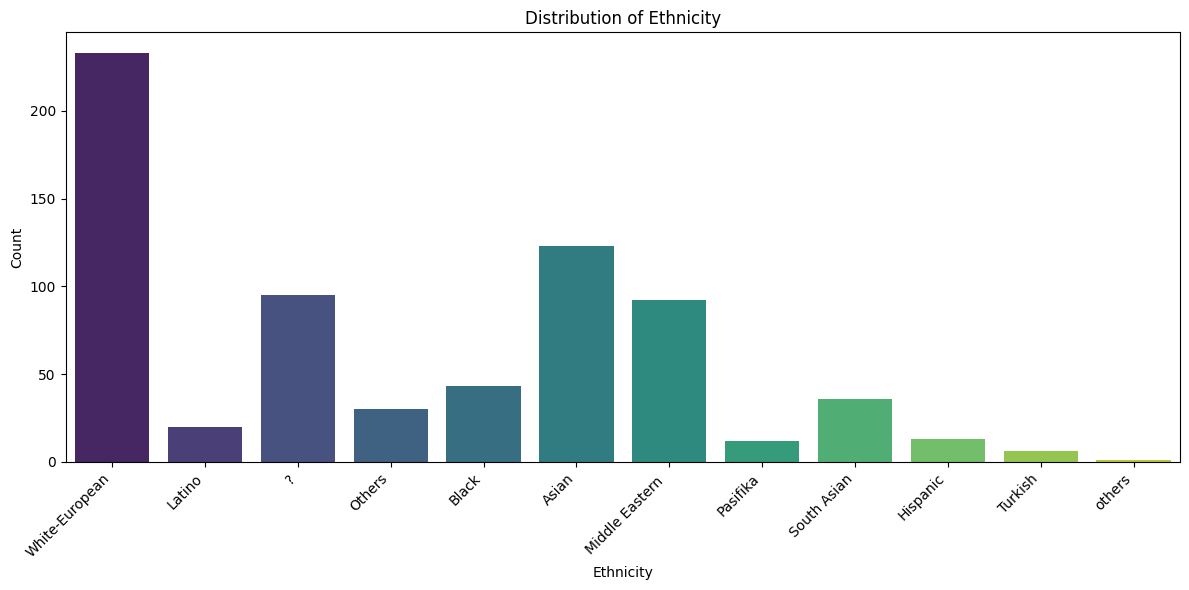

In [19]:
plt.figure(figsize=(12, 6))
sns.countplot(x='ethnicity', data=df, palette='viridis')
plt.title('Distribution of Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-20-4235033281.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='relation', data=df, palette='viridis')


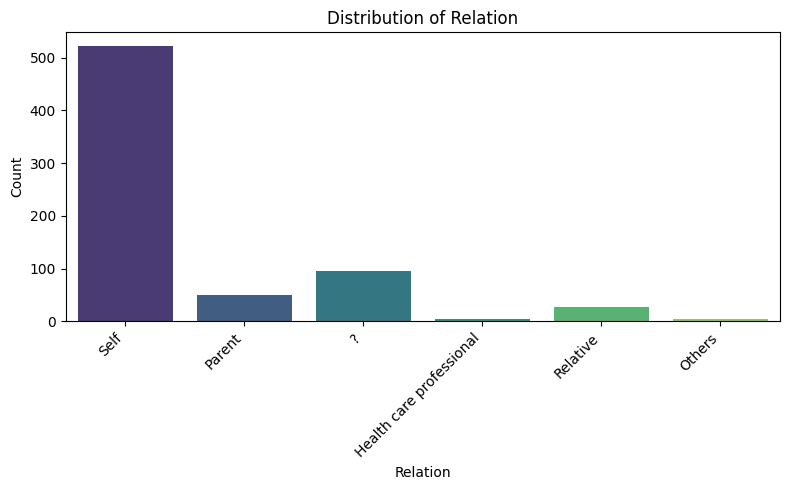

In [20]:
plt.figure(figsize=(8, 5))
sns.countplot(x='relation', data=df, palette='viridis')
plt.title('Distribution of Relation')
plt.xlabel('Relation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Data Preparation

In [21]:
X = df.drop('Class/ASD', axis=1)
y = df['Class/ASD']

In [22]:
X_encoded = pd.get_dummies(X, columns=[
    'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before', 'relation'
], drop_first=True)

In [23]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded)

In [25]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modeling

In [26]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation="relu", kernel_regularizer=l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu", kernel_regularizer=l2(0.01)),
    layers.Dropout(0.3),
    layers.Dense(1, activation="sigmoid")
])

In [27]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │         3,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,713 (14.50 KB)

 Trainable params: 3,713 (14.50 KB)

 Non-trainable params: 0 (0.00 B)

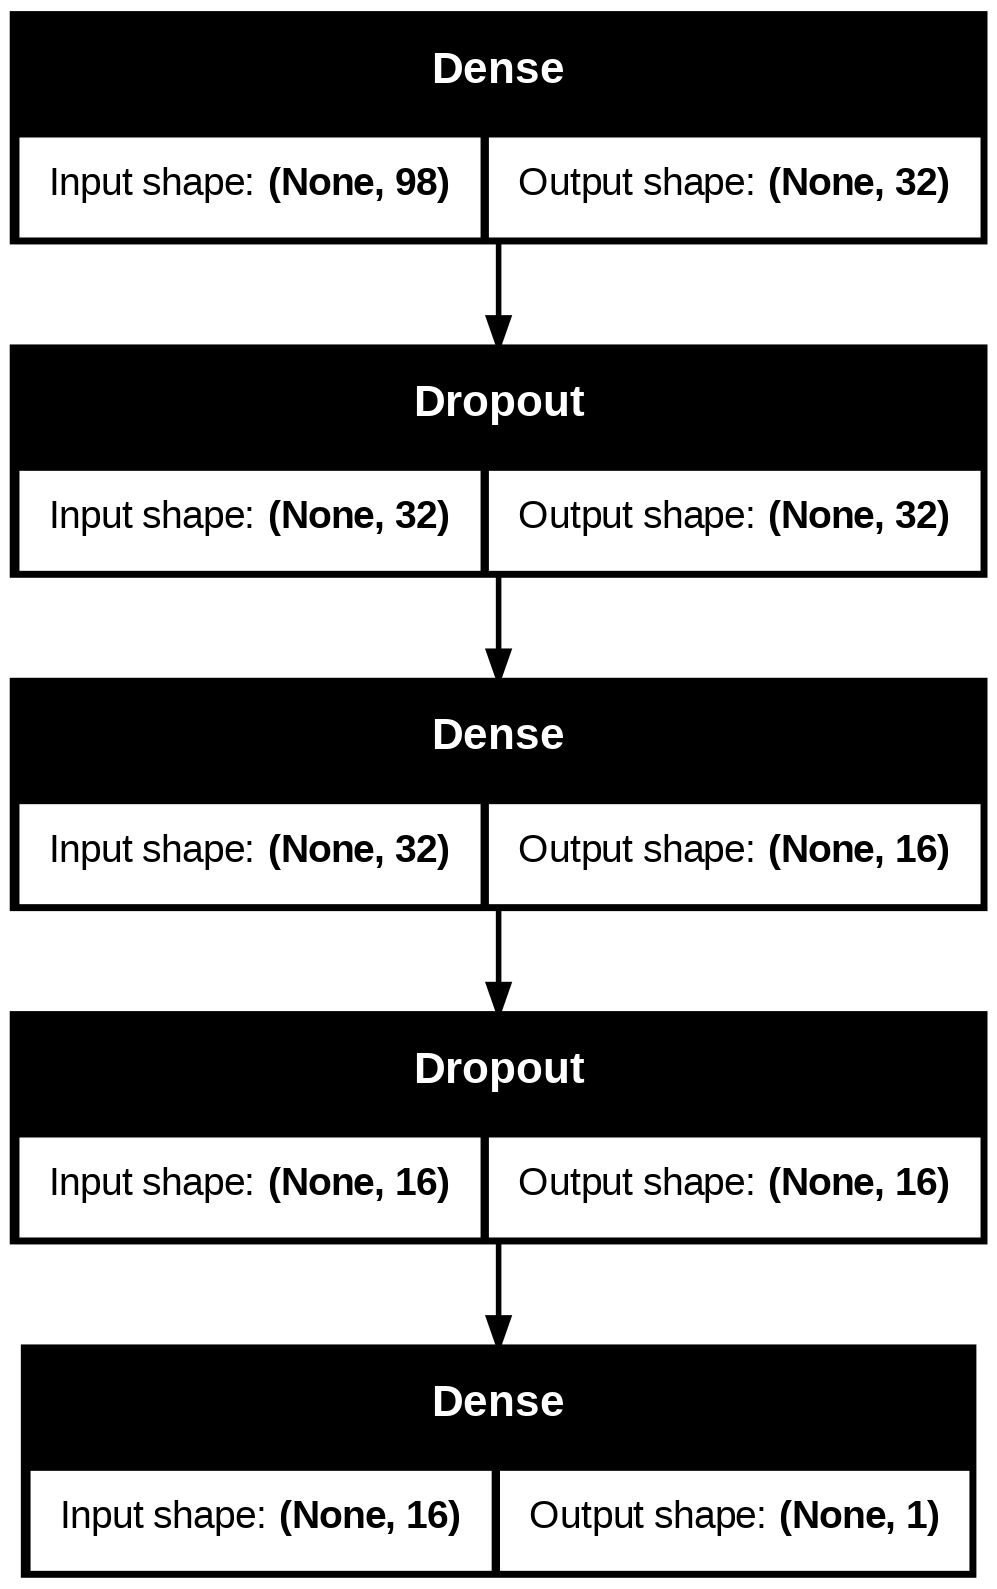

In [29]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

In [30]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

In [31]:
history = model.fit(
    X_train_scaled, y_train,
    epochs=200,
    validation_data=(X_test_scaled, y_test),
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.6373 - loss: 1.3153 - val_accuracy: 0.7376 - val_loss: 1.1931
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7037 - loss: 1.1586 - val_accuracy: 0.7305 - val_loss: 1.0589
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7121 - loss: 1.0435 - val_accuracy: 0.7305 - val_loss: 0.9458
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7387 - loss: 0.9399 - val_accuracy: 0.7376 - val_loss: 0.8528
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7809 - loss: 0.8324 - val_accuracy: 0.7801 - val_loss: 0.7754
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7547 - loss: 0.7775 - val_accuracy: 0.8227 - val_loss: 0.7072
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7956 - loss: 0.7029 - val_accuracy: 0.8298 - val_loss: 0.6493
Epoch 8/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8385 - loss: 0.6468 - val_accuracy: 0.8440 -

# Evaluation

In [32]:
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Accuracy: {accuracy*100:.2f}%")
print(f"Test Loss: {loss:.4f}")

Test Accuracy: 98.58%
Test Loss: 0.1043


In [33]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

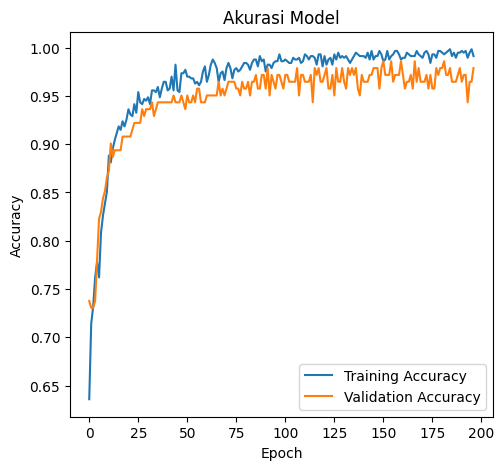

In [34]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

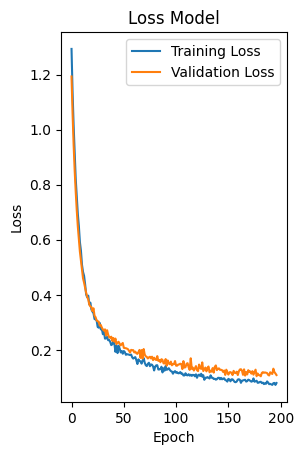

In [35]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

--- Classification Report ---
              precision    recall  f1-score   support

          NO       0.98      1.00      0.99       103
         YES       1.00      0.95      0.97        38

    accuracy                           0.99       141
   macro avg       0.99      0.97      0.98       141
weighted avg       0.99      0.99      0.99       141


--- Confusion Matrix ---


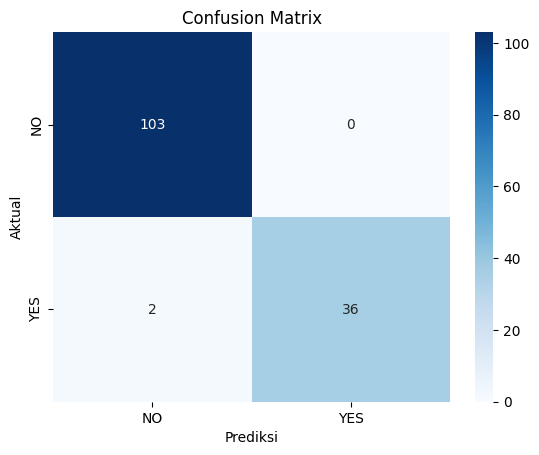

In [36]:
y_pred_prob = model.predict(X_test_scaled)
y_pred_classes = (y_pred_prob > 0.5).astype("int32")

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred_classes, target_names=['NO', 'YES']))

print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()


# Deployment

## Model Simulation

In [37]:
print(X.columns.tolist())

['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before', 'result', 'relation']


In [38]:
sample_data = {
    'A1_Score': 1,
    'A2_Score': 1,
    'A3_Score': 0,
    'A4_Score': 1,
    'A5_Score': 1,
    'A6_Score': 0,
    'A7_Score': 1,
    'A8_Score': 1,
    'A9_Score': 1,
    'A10_Score': 1,
    'age': 27.0,
    'gender': 'm',
    'ethnicity': 'Latino',
    'jundice': 'yes',
    'austim': 'yes',
    'contry_of_res': 'Spain',
    'used_app_before': 'no',
    'result': 8.0,
    'relation': 'Parent'
}

In [39]:
sample_df = pd.DataFrame([sample_data])

In [40]:
categorical_cols = [
    'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before', 'relation'
]

In [41]:
sample_encoded = pd.get_dummies(sample_df, columns=categorical_cols, drop_first=True)
final_sample = sample_encoded.reindex(columns=X_encoded.columns, fill_value=0)
sample_scaled = scaler.transform(final_sample)

In [42]:
predicted_prob = model.predict(sample_scaled)
predicted_class = 1 if predicted_prob >= 0.5 else 0
predicted_label = le.inverse_transform([predicted_class])[0]

print("--- Hasil Simulasi Prediksi ---")
print(f"Probabilitas mentah dari model: {predicted_prob[0][0]:.4f}")
print(f"Hasil prediksi kelas (0=NO, 1=YES): {predicted_class}")
print(f"Diagnosis Berdasarkan Input: Seseorang dengan karakteristik ini kemungkinan '{predicted_label}' memiliki ASD.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
--- Hasil Simulasi Prediksi ---
Probabilitas mentah dari model: 0.9874
Hasil prediksi kelas (0=NO, 1=YES): 1
Diagnosis Berdasarkan Input: Seseorang dengan karakteristik ini kemungkinan 'YES' memiliki ASD.


## SAVE MODEL

In [43]:
# Konversi model ke TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model
with open('autism-screening-on-adults.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpd_cbtqyl'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 98), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  139328324999824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139330873285456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139330873279888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139330873281232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139329968702864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139329968703632: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [44]:
# Simpan label encoder dan scaler
import joblib
joblib.dump(le, 'label_encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']